# Experiment No. 2

### Name: Vivek Vitthal Avhad (4031)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses #type: ignore
import matplotlib.pyplot as plt

2025-08-18 18:23:22.393226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 18:23:22.485705: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 18:23:22.563786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755521602.637074   10031 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755521602.656980   10031 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755521602.812780   10031 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train),
np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),
np.prod(x_test.shape[1:])))

In [3]:
latent_dim = 10
input_dim = 784

In [4]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.dense1 = layers.Dense(512, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
    def call(self, inputs):
        x = self.dense1(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        return z_mean, z_log_var

In [5]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [6]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, original_dim):
        super(Decoder, self).__init__()
        self.dense1 = layers.Dense(512, activation="relu")
        self.dense_output = layers.Dense(original_dim,
activation="sigmoid")
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense_output(x)

In [7]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampling()
    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sampler((z_mean, z_log_var))
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_sum(
        1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl_loss))
        return reconstructed

In [8]:
encoder = Encoder(latent_dim)
decoder = Decoder(input_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss=losses.MeanSquaredError())

2025-08-18 18:23:26.342736: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
# Train
vae.fit(x_train, x_train,
epochs=50,
batch_size=128,
validation_data=(x_test, x_test))
# Reconstruct images
decoded_imgs = vae.predict(x_test[:10])

2025-08-18 18:23:26.533099: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-08-18 18:23:27.061787: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0947 - val_loss: 0.0683
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0947 - val_loss: 0.0683
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0679 - val_loss: 0.0680
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0679 - val_loss: 0.0680
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0677 - val_loss: 0.0677
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0677 - val_loss: 0.0677
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0675 - val_loss: 0.0677
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0675 - val_loss: 0.0677
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step -

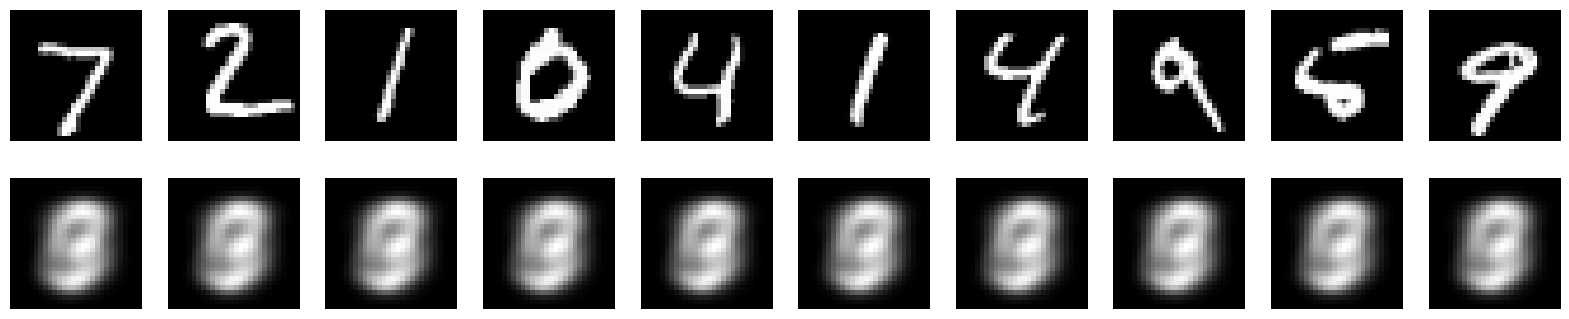

In [10]:
plt.figure(figsize=(20, 4))
for i in range(10):# Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
    # Reconstructed
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()

## Practice Questions:

1. Change latent dimension from 2 to 10 and visualize the latent space.
2. Use a convolutional VAE instead of dense layers.
3. Generate new images by sampling from 2D Gaussian.
4. Apply the VAE to Fashion MNIST dataset.
5. Visualize decoder output for multiple z values.

In [11]:
# Load data
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()  # Q4: Fashion-MNIST
# (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()       # use MNIST if needed

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


In [12]:

# ---- For Dense VAE ----
x_train = x_train.reshape((len(x_train), 784))
x_test  = x_test.reshape((len(x_test), 784))
latent_dim = 2     # Q1: try 2 for latent space visualization, 10 for better recon
input_dim = 784


In [13]:

# Encoder
class Encoder(layers.Layer):
    def __init__(self, latent_dim):
        super().__init__()
        self.dense1 = layers.Dense(512, activation="relu")
        self.mean   = layers.Dense(latent_dim)
        self.logvar = layers.Dense(latent_dim)
    def call(self, x):
        x = self.dense1(x)
        return self.mean(x), self.logvar(x)

In [14]:
# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

In [15]:
# Decoder
class Decoder(layers.Layer):
    def __init__(self, original_dim):
        super().__init__()
        self.d1 = layers.Dense(512, activation="relu")
        self.out = layers.Dense(original_dim, activation="sigmoid")
    def call(self, z):
        return self.out(self.d1(z))

In [16]:

# VAE Model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampling()
    def call(self, x):
        z_mean, z_log_var = self.encoder(x)
        z = self.sampler((z_mean, z_log_var))
        recon = self.decoder(z)
        # KL Divergence loss
        kl = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        self.add_loss(tf.reduce_mean(kl))
        return recon


In [17]:
encoder = Encoder(latent_dim)
decoder = Decoder(input_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam", loss=losses.MeanSquaredError())

In [18]:
# Train
vae.fit(x_train, x_train,
        epochs=20, batch_size=128,
        validation_data=(x_test, x_test))

2025-08-18 18:29:06.311943: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-08-18 18:29:06.717505: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1158 - val_loss: 0.0888
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1158 - val_loss: 0.0888
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0885 - val_loss: 0.0876
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0885 - val_loss: 0.0876
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0875 - val_loss: 0.0870
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0875 - val_loss: 0.0870
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0872 - val_loss: 0.0869
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 

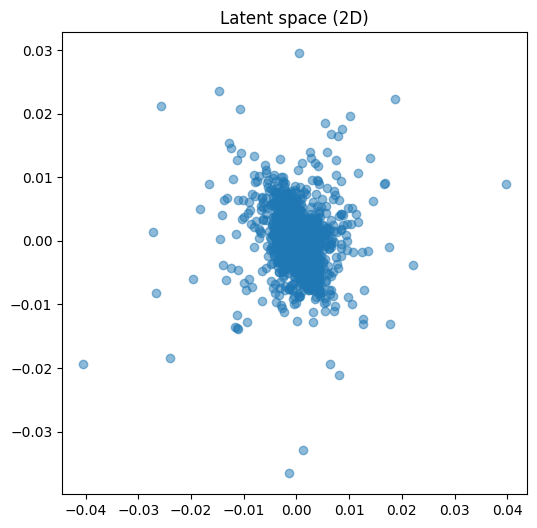

In [19]:

# Q1 & Q3: Visualize latent space if latent_dim=2, and sample new images
if latent_dim == 2:
    z_mean, z_log_var = encoder(x_test)
    z = z_mean.numpy()
    plt.figure(figsize=(6,6))
    plt.scatter(z[:,0], z[:,1], alpha=0.5)
    plt.title("Latent space (2D)")
    plt.show()

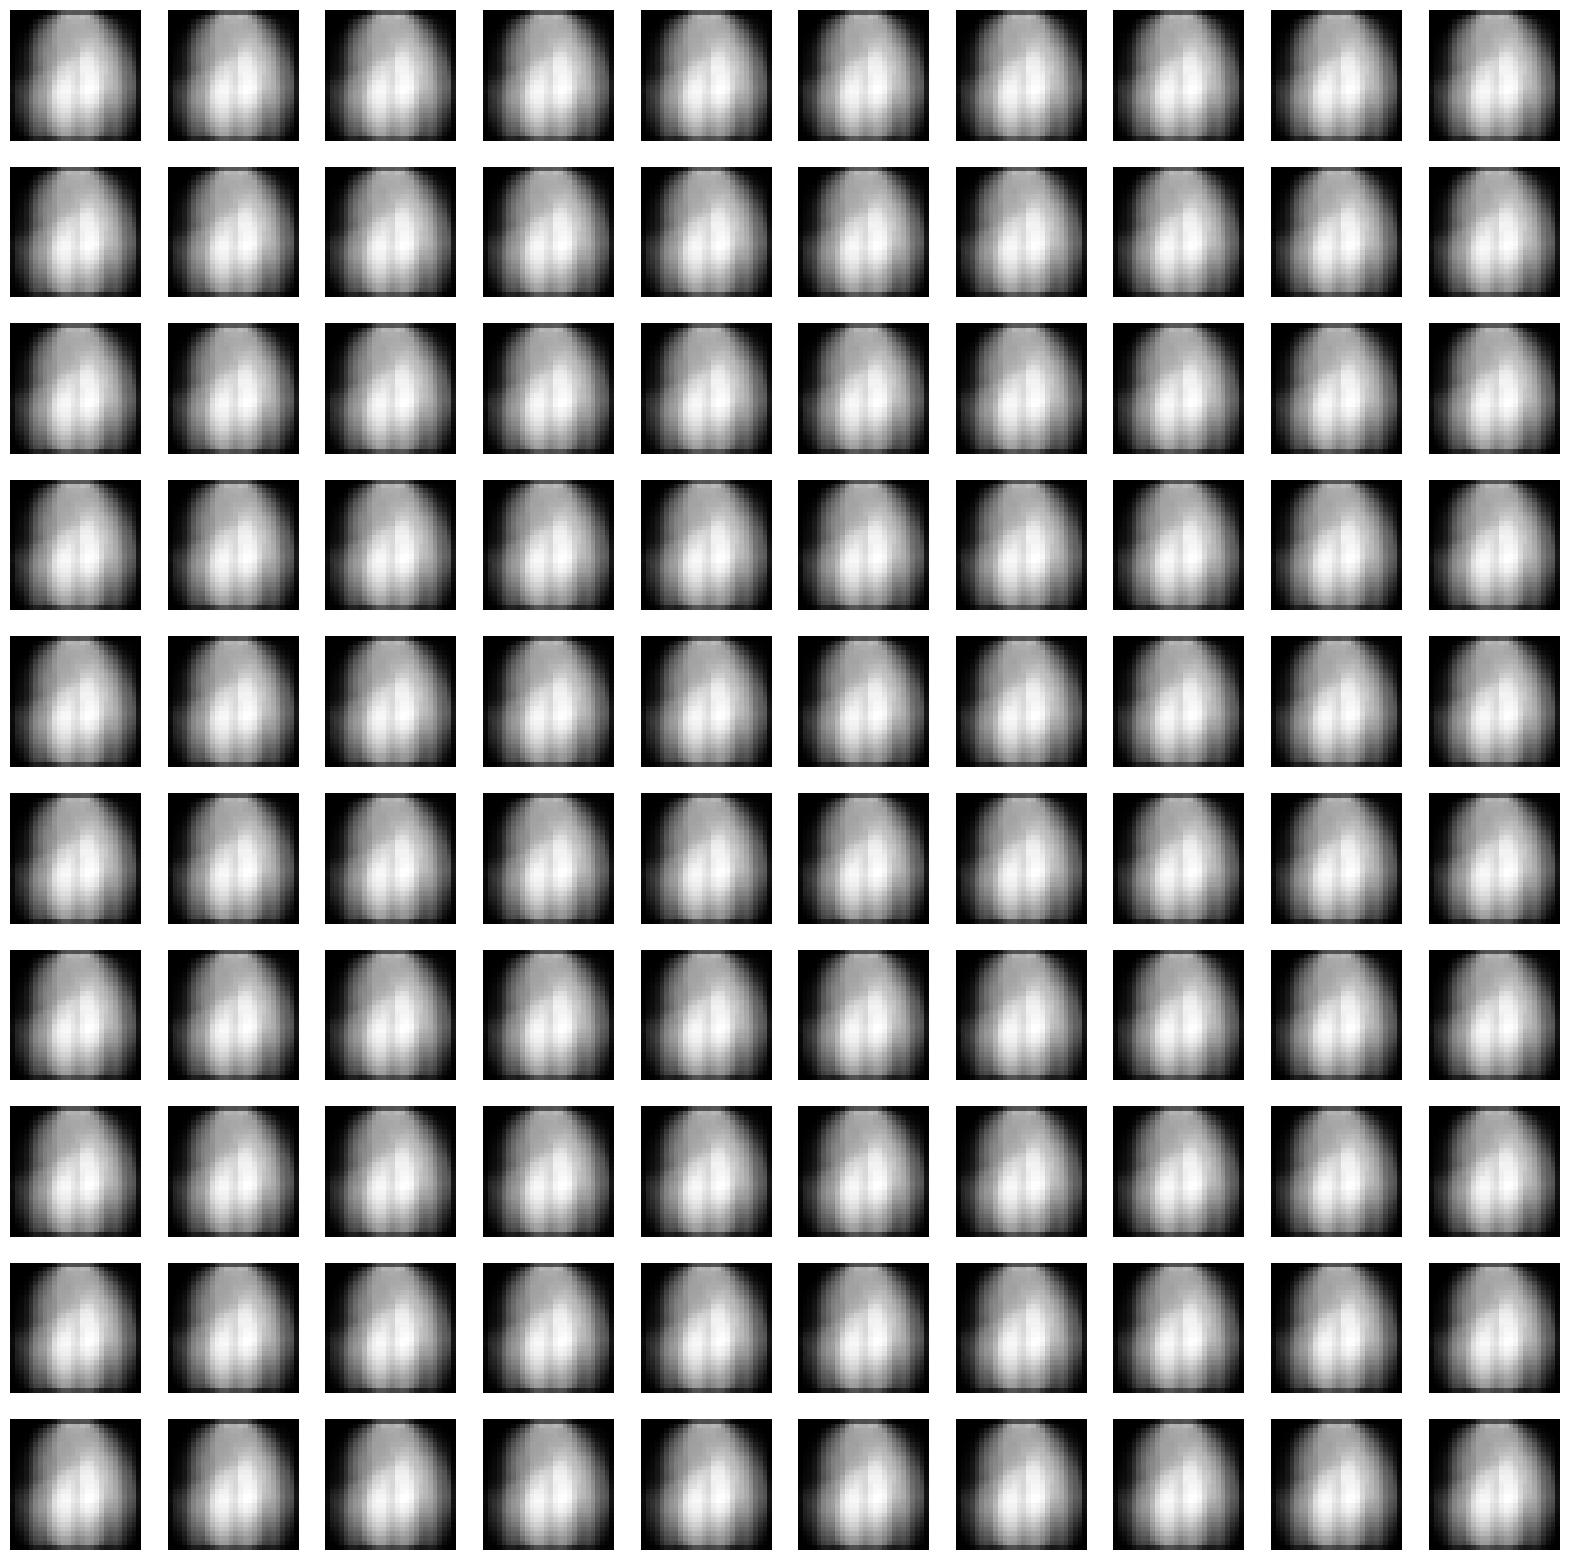

In [20]:
# Q3: generate new images by sampling grid of z values
if latent_dim == 2:
    nx, ny = 10, 10
    grid_x = np.linspace(-2, 2, nx)
    grid_y = np.linspace(-2, 2, ny)
    plt.figure(figsize=(20, 20))
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder(z_sample).numpy()
            ax = plt.subplot(ny, nx, i*nx + j + 1)
            plt.imshow(x_decoded[0].reshape(28,28), cmap="gray")
            ax.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


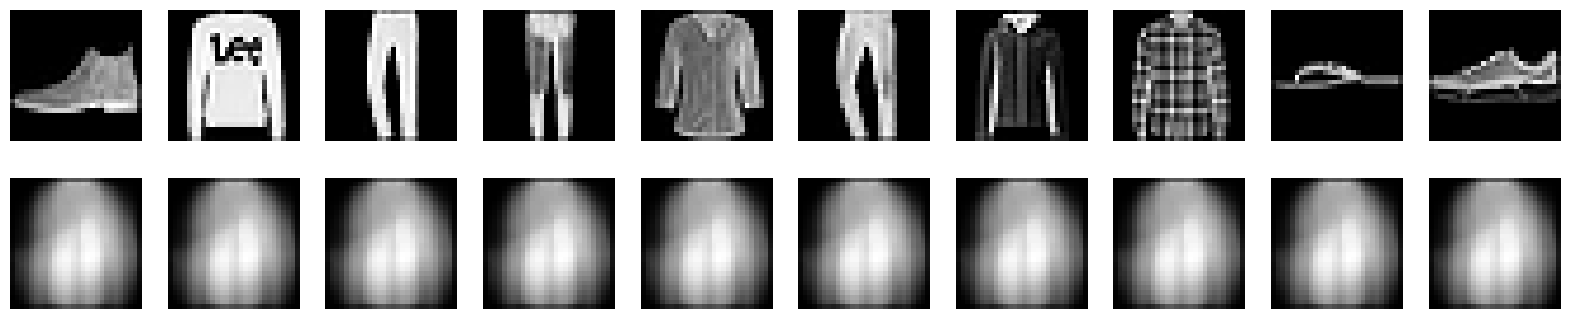

In [21]:
# Reconstructions
decoded_imgs = vae.predict(x_test[:10])
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    ax.axis('off')
    # reconstructed
    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    ax.axis('off')
plt.show()